In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# importing ploting libraries
import matplotlib.pyplot as plt 
from sklearn import datasets
%matplotlib inline

In [2]:
iris = datasets.load_iris()
x = iris.data

In [4]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [3]:
sc = StandardScaler()
x_sc = sc.fit_transform(x)
x_sc

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [5]:
cov_matrix = np.cov(x_sc.T)
cov_matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [7]:
eigval, eigvec = np.linalg.eig(cov_matrix)

In [8]:
eigval

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [9]:
eigvec

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [11]:
tot = sum(eigval)
tot

4.026845637583896

In [13]:
var_exp = [(i/tot)*100 for i in sorted(eigval, reverse=True)]
var_exp

[72.96244541329985, 22.85076178670178, 3.668921889282873, 0.5178709107154758]

In [14]:
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([ 72.96244541,  95.8132072 ,  99.48212909, 100.        ])

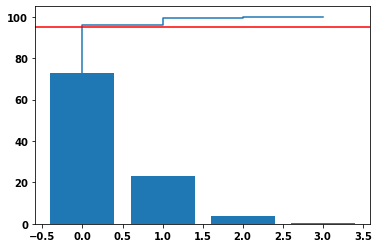

In [17]:
plt.bar(range(4), var_exp)
plt.step(range(4), cum_var_exp)
plt.axhline(95, c='red')
plt.show()

In [18]:
from sklearn.decomposition import PCA

In [26]:
mypca = PCA(n_components=2)

In [27]:
pca2_data = mypca.fit_transform(x_sc)
pca2_df = pd.DataFrame(pca2_data)
pca2_df.head()

,0,1
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


In [28]:
# if we want to compute based on threshold
mypca = PCA(n_components=.99)

In [29]:
pca2_data = mypca.fit_transform(x_sc)
pca2_df = pd.DataFrame(pca2_data)
pca2_df.head()

,0,1,2
0,-2.264703,0.480027,-0.127706
1,-2.080961,-0.674134,-0.234609
2,-2.364229,-0.341908,0.044201
3,-2.299384,-0.597395,0.091290
4,-2.389842,0.646835,0.015738


In [30]:
# if we want to compute based on threshold
mypca = PCA(n_components=.90)

In [31]:
pca2_data = mypca.fit_transform(x_sc)
pca2_df = pd.DataFrame(pca2_data)
pca2_df.head()

,0,1
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


In [49]:
mypca.explained_variance_

array([2.93808505, 0.9201649 ])

In [50]:
mypca.explained_variance_ratio_

array([0.72962445, 0.22850762])

### LDA

In [32]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [46]:
mylda = LDA()

In [34]:
y = iris['target']

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(x_sc, y, test_size=0.2, random_state=0)

In [47]:
mylda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [52]:
mylda.explained_variance_ratio_

array([0.9911804, 0.0088196])

In [53]:
y_pred_lda = mylda.predict(X_test)

In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [55]:
print(confusion_matrix(y_test, y_pred_lda))

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [56]:
print(accuracy_score(y_test, y_pred_lda))

1.0


<AxesSubplot:>

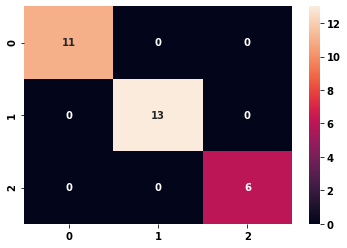

In [58]:
sns.heatmap(confusion_matrix(y_test, y_pred_lda), annot=True)